In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Ancho y alto de la pantalla usada:

In [9]:
WIDTH_SCREEN = 1920
HEIGTH_SCREEN = 1080

In [10]:
global_csv_filename = "gaze_data.csv"
global_heat_map_filename = "heatmap_data_1.csv"

In [11]:
df = pd.read_csv(global_csv_filename)

In [12]:
df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system,Event
0,0.348995,0.548616,0.350375,0.552178,4.789185,4.728241,229888379,1472534456,Evento 0
1,0.347021,0.548693,0.349942,0.547541,4.796143,4.734863,229905034,1472551121,Evento 0
2,0.347330,0.549302,0.351262,0.547419,4.794785,4.733337,229921689,1472567792,Evento 0
3,0.347693,0.543544,0.350297,0.550931,4.804962,4.737762,229938344,1472584465,Evento 0
4,0.348173,0.542777,0.352406,0.545402,4.820709,4.734085,229954998,1472601127,Evento 0


In [13]:
df.describe()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system
count,231.000000,231.000000,232.000000,232.000000,231.000000,232.000000,2.350000e+02,2.350000e+02
mean,0.637842,0.216662,0.654475,0.221784,4.992062,4.949560,2.318370e+08,1.474483e+09
std,0.303714,0.170194,0.325892,0.201637,0.215422,0.264107,1.132233e+06,1.132233e+06
min,0.105288,-0.034133,0.099721,-0.156212,4.653534,4.595016,2.298884e+08,1.472534e+09
25%,0.304066,0.111829,0.306206,0.143260,4.823242,4.729671,2.308627e+08,1.473509e+09
50%,0.761472,0.196871,0.750390,0.221178,4.929184,4.863312,2.318370e+08,1.474483e+09
75%,0.904239,0.273636,0.918279,0.291229,5.136063,5.109985,2.328113e+08,1.475457e+09
max,0.995335,0.578066,1.119147,0.625342,5.478226,5.596069,2.337856e+08,1.476432e+09


**df.describe()**: statistical summary of the DataFrame: count, meanm standard deviation, minimum and maximum values for each column. 

### **LIMPIEZA DE DATOS**

 **·  Filas con valores NaN:** eliminamos la fila

In [14]:
not_Nan_df = df.dropna()

In [15]:
not_Nan_df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system,Event
0,0.348995,0.548616,0.350375,0.552178,4.789185,4.728241,229888379,1472534456,Evento 0
1,0.347021,0.548693,0.349942,0.547541,4.796143,4.734863,229905034,1472551121,Evento 0
2,0.347330,0.549302,0.351262,0.547419,4.794785,4.733337,229921689,1472567792,Evento 0
3,0.347693,0.543544,0.350297,0.550931,4.804962,4.737762,229938344,1472584465,Evento 0
4,0.348173,0.542777,0.352406,0.545402,4.820709,4.734085,229954998,1472601127,Evento 0


### EXTRACCIÓN DATOS PARA INPUT DEL GENERADOR DE MAPAS DE CALOR

Me genero un archivo solo con x e y de un ojo para probar el heat map generator

Como los valores de Left Eye X y Left Eye Y vienen en proporción a la anchura y altura de la pantalla, es decir, 0.5 significa que se mira a la mitad de la pantalla, multiplico los datos de ambos para que queden en números enteros, que es lo que admite el programa de generar mapas de calor.

In [16]:
df_heatmap = pd.DataFrame()

df_heatmap['X'] = ((not_Nan_df['Left Eye X'] + not_Nan_df['Right Eye X']) / 2 * WIDTH_SCREEN).astype(int)
df_heatmap['Y'] = ((not_Nan_df['Left Eye Y'] + not_Nan_df['Right Eye Y']) / 2 * HEIGTH_SCREEN).astype(int)

df_heatmap['X'] = df_heatmap['X'].round(0)
df_heatmap['Y'] = df_heatmap['Y'].round(0)

df_heatmap.to_csv(global_heat_map_filename, index=False, header=False)

<Axes: >

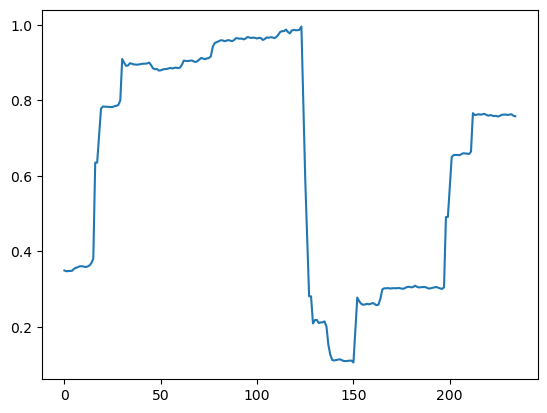

In [9]:
not_Nan_df['Left Eye X'].plot()

**· Filas con valores Nan:** Sustituir por la media de la columna

In [10]:
mean_left_eye_x = df["Left Eye X"].mean()
df["Left Eye X"].fillna(mean_left_eye_x, inplace = True)
df.head()

,Left Eye X,Left Eye Y,Right Eye X,Right Eye Y,Pupil left eye,Pupil right eye,Timestamp device,Timestamp system,Event
0,0.348995,0.548616,0.350375,0.552178,4.789185,4.728241,229888379,1472534456,Evento 0
1,0.347021,0.548693,0.349942,0.547541,4.796143,4.734863,229905034,1472551121,Evento 0
2,0.347330,0.549302,0.351262,0.547419,4.794785,4.733337,229921689,1472567792,Evento 0
3,0.347693,0.543544,0.350297,0.550931,4.804962,4.737762,229938344,1472584465,Evento 0
4,0.348173,0.542777,0.352406,0.545402,4.820709,4.734085,229954998,1472601127,Evento 0


## GRÁFICAS

#### Gráficas sacadas a partir de la colección de datos originales (sin quitar Nan o sustituir por nada)

Posición X ojo izquierdo

<Axes: >

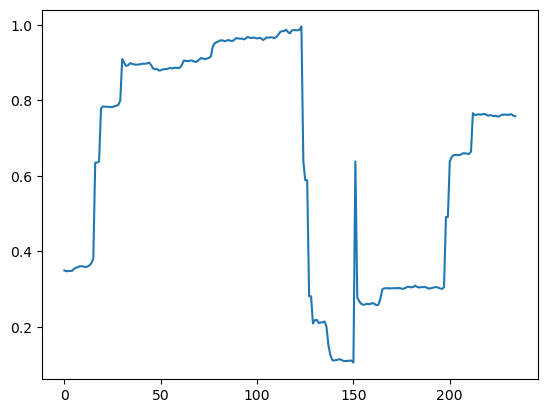

In [11]:
df['Left Eye X'].plot()

Posición Y ojo izquierdo

<Axes: >

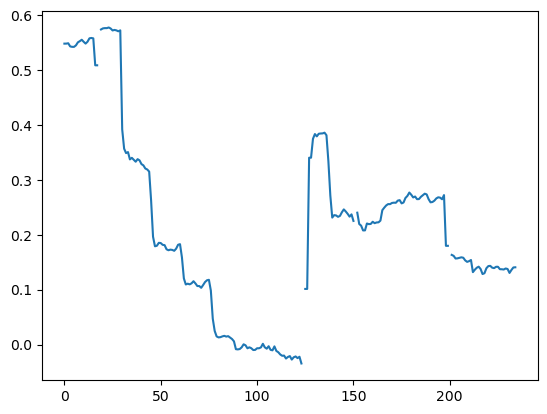

In [12]:
df['Left Eye Y'].plot()

Posición X ojo derecho

<Axes: >

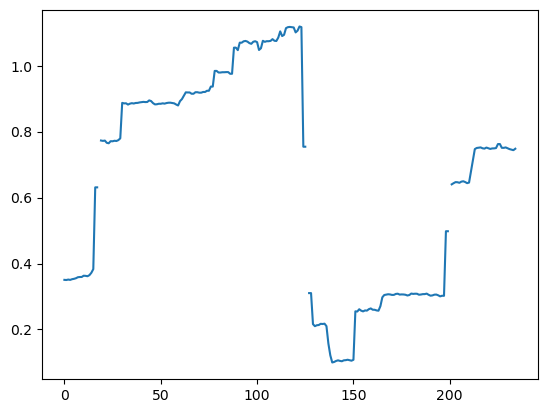

In [13]:
df['Right Eye X'].plot()

Posición Y ojo derecho

Si probamos a hacer el plot sin especificar decimal como comas, vemos que nos da error al no reconocer los datos como numéricos.

<Axes: >

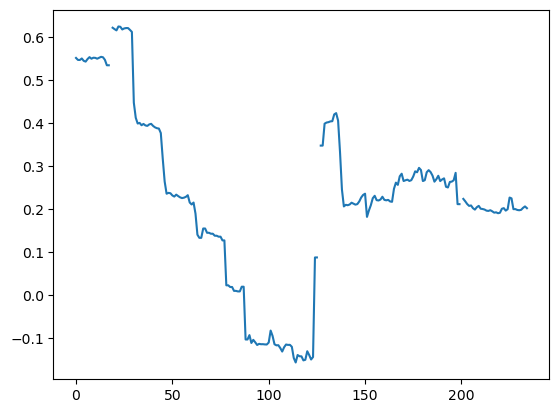

In [14]:
df['Right Eye Y'].plot()

Comparación posición X de ojo derecho y ojo izquierdo

<Axes: xlabel='Left Eye X', ylabel='Right Eye X'>

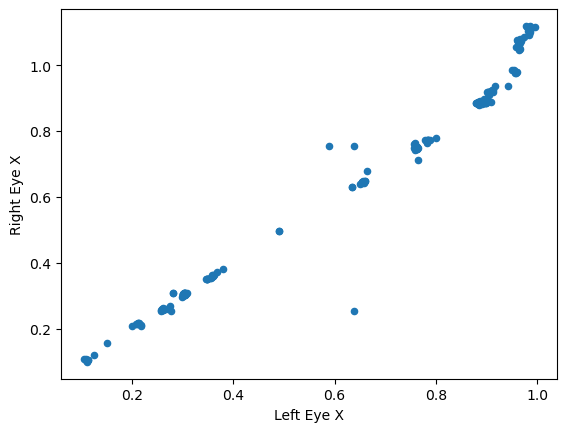

In [15]:
df.plot.scatter(x='Left Eye X', y='Right Eye X')

Comparación posición Y de ojo derecho y ojo izquierdo

<Axes: xlabel='Left Eye Y', ylabel='Right Eye Y'>

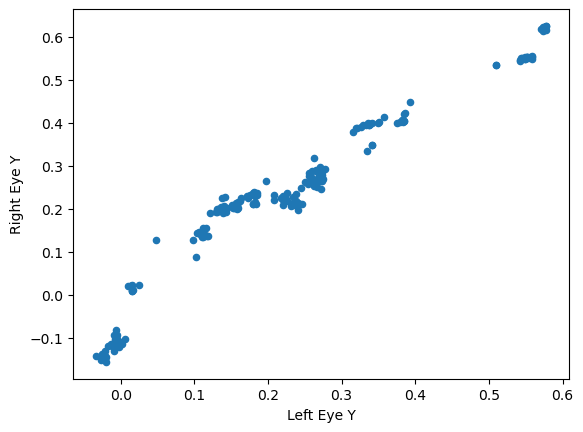

In [16]:
df.plot.scatter(x='Left Eye Y', y='Right Eye Y')

Comparación tamaño pupilas ojo derecho y ojo izquierdo

<Axes: xlabel='Pupil right eye', ylabel='Pupil left eye'>

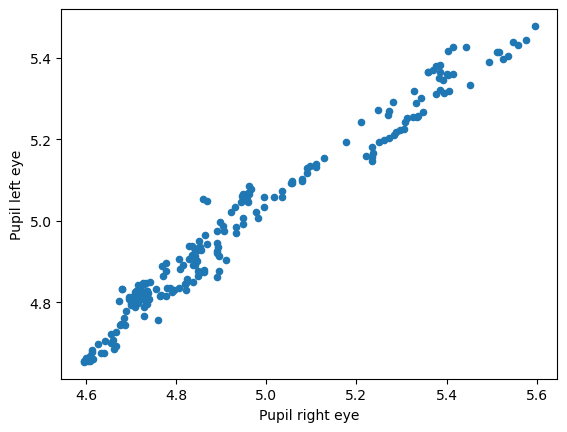

In [17]:
df.plot.scatter(x='Pupil right eye', y='Pupil left eye')

Tamaño de la pupila izquierda

<Axes: >

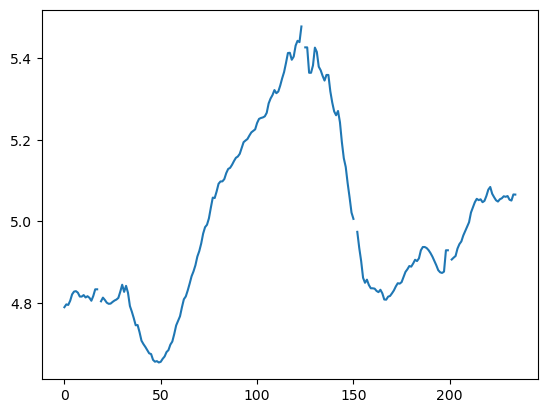

In [18]:
df['Pupil left eye'].plot()

Tamaño de la pupila derecha

<Axes: >

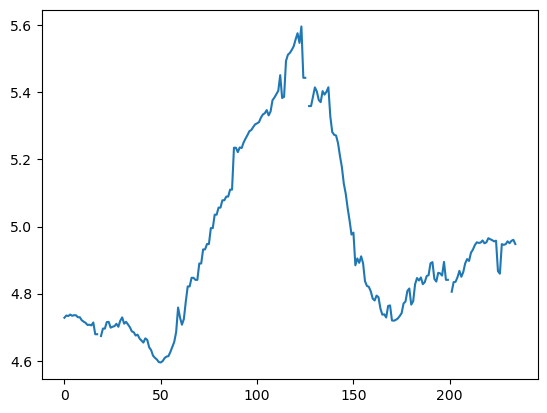

In [19]:
df['Pupil right eye'].plot()

### Gráficas sacadas por Eventos

Gráfica de la posicion X del ojo izquierdo pero solo para el Evento 0

<Axes: >

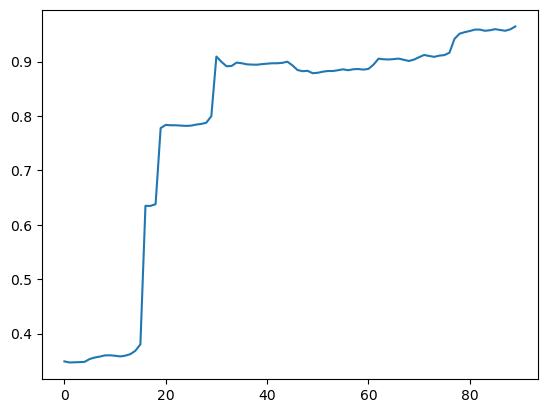

In [20]:
event_0 = df['Event'] == 'Evento 0'
left_eye_x_event_0 = df[event_0]['Left Eye X']
left_eye_x_event_0.plot()

<Axes: >

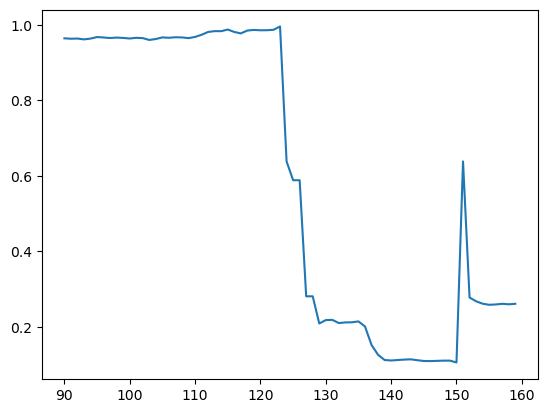

In [21]:
event_1 = df['Event'] == 'Evento 1'
left_eye_x_event_1 = df[event_1]['Left Eye X']
left_eye_x_event_1.plot()

### Comparativas de gráficas realizadas de formas diferentes

Eliminar valores Nan **vs** Rellenar huecos de esos valores para obtener gráfica continua

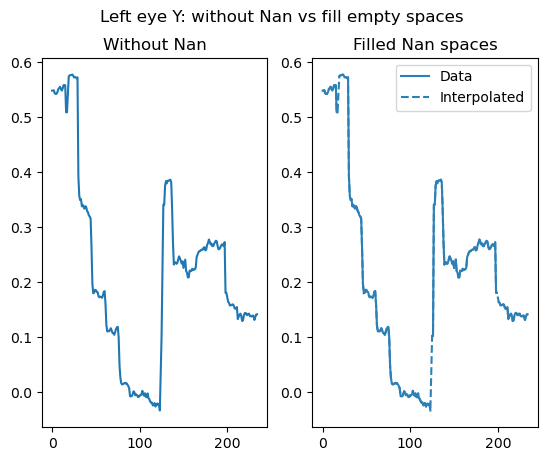

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Left eye Y: without Nan vs fill empty spaces')

ax1.plot(not_Nan_df['Left Eye Y'])
ax1.set_title('Without Nan')

filled_Nan_df = df['Left Eye Y'].interpolate()
ax2.plot(df.index, df['Left Eye Y'], label='Data', color='#2d80b6')
ax2.plot(df.index, filled_Nan_df, label='Interpolated', linestyle='--', color='#2d80b6')
ax2.set_title('Filled Nan spaces')

ax2.legend()

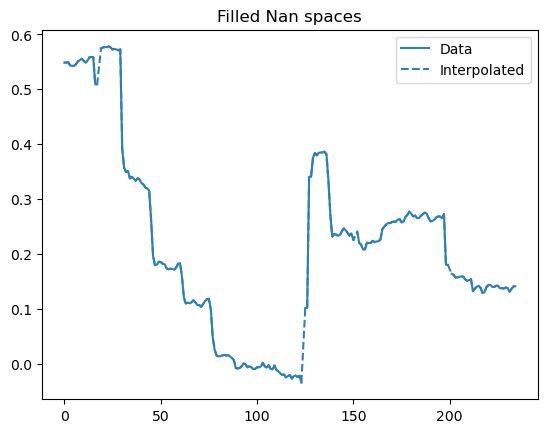

In [23]:

fig, ax = plt.subplots()


filled_Nan_df = df['Left Eye Y'].interpolate()
ax.plot(df.index, df['Left Eye Y'], label='Data', color='#2d80b6')
ax.plot(df.index, filled_Nan_df, label='Interpolated', linestyle='--', color='#2d80b6')
ax.set_title('Filled Nan spaces')
ax.legend()